# <div align="center">Lab 3 - Analysis of Variance </div>
## <div align="center"> Elder de Sousa Whalen </div><br>
## <div align="right"> 9.26.2020</div>

### Overview
The one-way analysis of variance (ANOVA) is a test used to compare the mean of a variable between different groups. In this test, the null hypothesis is that there is no difference in the mean between the different groups. The alternative hypothesis is that at least one group mean is different from another other group. ANOVA uses F-tests to evaluate if there is a difference between in the mean when there are three or more groups. F-tests uses F-statistic which is the ratio between two variances, the variance between groups in the numerator and the variance within a group in the denominator.

![F-statistic](https://s0.wp.com/latex.php?latex=F%3D+%7B%5Cdisplaystyle+%5Cfrac+%7B%7B%5Ctext%7Bbetween-groups+variance%7D%7D%7D%7B%7B%5Ctext%7Bwithin-group+variance%7D%7D%7D%7D&bg=ffffff&fg=000&s=0)

The value in the numerator is given by the adjusted mean square reported in the ANOVA test. The variance within group is given by the sum of squares distance divided by the degrees of freedom in the error. 

The base of the hypothesis test is on the rejection or not of the null hypothesis. If there are multiple hypothesis being tested, the chances of observing a rare event, one that could reject the null hypothesis, is increased. To compensate for that increase, the Bonferroni correction is used. The Bonferroni correction tests each individual hypothesis at a significance level of $\alpha$/m, where m is the number of hypothesis being tested.

In the case of rejection of the null hypothesis in the ANOVA, meaning that there could be a difference in the mean between groups it is useful to identify which groups differ from each other. 

In this assignment we want to compare the results of ANOVA from two fictitious datasets. Both datasets generate some demographic data (voter race) and some numeric values (voter age). ANOVA is then used to compare the average age between the different groups (race)

### Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from collections import Counter

In the first dataset, five races are created under the variable races: asian, black, hispnica, other and white. Then a sample of size 1000 is created randomly selecting between the five races, using different probabilities for each race. The age for each one of the 1000 voters is randomly generated with a poisson distribution.

In [2]:
# First dataset (http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16_23.html)

np.random.seed(12)

races =   ["asian","black","hispanic","other","white"]

# Generate random data
voter_race_s = np.random.choice(a= races,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

voter_age_s = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

# Group age data by race
voter_frame_s = pd.DataFrame({"race":voter_race_s,"age":voter_age_s})
groups_s = voter_frame_s.groupby("race").groups

# Etract individual groups
asian_s = voter_age_s[groups_s["asian"]]
black_s = voter_age_s[groups_s["black"]]
hispanic_s = voter_age_s[groups_s["hispanic"]]
other_s = voter_age_s[groups_s["other"]]
white_s = voter_age_s[groups_s["white"]]

In the second dataset, we have the same five races: asian, black, hispnica, other and white. Then a sample of size 1000 is created randomly selecting between the five races, using different probabilities for each race. But unlike the first dataset, one of the groups will have the age values generated separately from the rest of the groups.

In [3]:
# Second dataset (http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16_23.html)

np.random.seed(12)

# Generate random data
voter_race_d = np.random.choice(a= races,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

# Use a different distribution for white ages
white_ages = stats.poisson.rvs(loc=18, 
                              mu=32,
                              size=1000)

voter_age_d = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

voter_age_d = np.where(voter_race_d=="white", white_ages, voter_age_d)

# Group age data by race
voter_frame_d = pd.DataFrame({"race":voter_race_d,"age":voter_age_d})
groups_d = voter_frame_d.groupby("race").groups   

# Extract individual groups
asian_d = voter_age_d[groups_d["asian"]]
black_d = voter_age_d[groups_d["black"]]
hispanic_d = voter_age_d[groups_d["hispanic"]]
other_d = voter_age_d[groups_d["other"]]
white_d = voter_age_d[groups_d["white"]]

### Exploratory Data Analysis

#### First dataset

In [4]:
# Check for missing values (Generated data shouldn't have any)

voter_frame_s.isnull().any().any()

False

In [5]:
print(voter_frame_s.head(10))
print(voter_frame_s.shape)

       race  age
0     black   51
1     white   49
2  hispanic   51
3     white   48
4     asian   56
5     white   40
6     white   51
7     asian   52
8     white   39
9     black   57
(1000, 2)


In [6]:
# Count the number of voters for each race

voter_frame_s.race.value_counts()

white       515
hispanic    244
black       147
other        50
asian        44
Name: race, dtype: int64

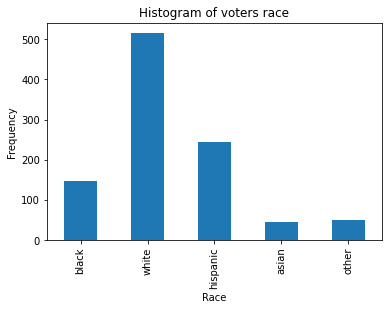

In [7]:
# Histogram of race

x = voter_frame_s.race

# use the Counter class from collections to create a dictionary with keys(text) and frequency
letter_counts = Counter(x)

# convert the dictionary to a DataFrame
df_s = pd.DataFrame.from_dict(letter_counts, orient='index')

# create the plot
df_s.plot(kind='bar', legend=False)

# Set the title and labels
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.title('Histogram of voters race')

# show the plot
plt.show()

We can see that there are a lot more voters belonging to race=white group. This is expected as during the random generation of the voter race variable, white had a much higher probability when compared to the others. This is true for both datasets.

In [8]:
# Generate some statistics for the variable age

voter_frame_s.describe()

,age
count,1000.000000
mean,47.773000
std,5.308074
min,34.000000
25%,44.000000
50%,48.000000
75%,51.000000
max,66.000000


In [9]:
# Generate some statistics for the variable age by group

voter_frame_s.groupby('race').describe()

age                                                    
          count       mean       std   min   25%   50%    75%   max
race                                                               
asian      44.0  48.886364  5.503554  37.0  44.0  49.5  54.00  59.0
black     147.0  47.551020  5.209559  34.0  44.0  47.0  51.00  61.0
hispanic  244.0  48.127049  5.885415  35.0  44.0  48.0  52.00  66.0
other      50.0  48.860000  5.166651  37.0  45.0  48.0  51.75  61.0
white     515.0  47.467961  5.021011  35.0  44.0  47.0  51.00  62.0

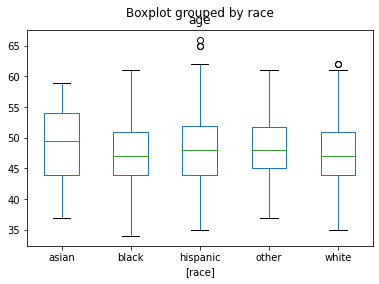

In [10]:
# Generate a boxplot to see the data distribution by race

voter_frame_s.boxplot(by='race', grid=False)

Visually it's not very clear if there is any difference in the average age between the different races. In this dataset we can some outliers (present on hispanic and white races).

#### Second dataset

In [11]:
# Check for missing values (Generated data shouldn't have any)

voter_frame_d.isnull().any().any()

False

In [12]:
# Second dataset

print(voter_frame_d.head(10))
print(voter_frame_d.shape)

       race  age
0     black   54
1     white   51
2  hispanic   53
3     white   50
4     asian   51
5     white   42
6     white   53
7     asian   46
8     white   41
9     black   40
(1000, 2)


In [13]:
# Count the number of voters for each race

voter_frame_d.race.value_counts()

white       515
hispanic    244
black       147
other        50
asian        44
Name: race, dtype: int64

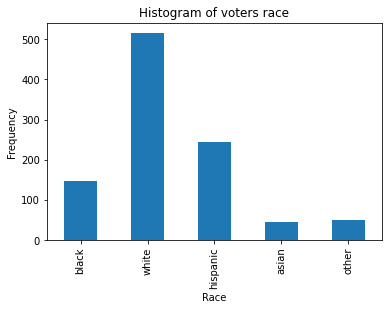

In [14]:
# Histogram of race

x = voter_frame_d.race

# use the Counter class from collections to create a dictionary with keys(text) and frequency
letter_counts = Counter(x)

# convert the dictionary to a DataFrame
df_d = pd.DataFrame.from_dict(letter_counts, orient='index')

# create the plot
df_d.plot(kind='bar', legend=False)

# Set the title and labels
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.title('Histogram of voters race')

# show the plot
plt.show()

In [15]:
# Generate some statistics for the variable age

voter_frame_d.describe()

,age
count,1000.00000
mean,49.14100
std,5.72205
min,29.00000
25%,45.00000
50%,49.00000
75%,53.00000
max,72.00000


In [16]:
# Generate some statistics for the variable age by group

voter_frame_d.groupby('race').describe()

age                                                   
          count       mean       std   min   25%   50%   75%   max
race                                                              
asian      44.0  48.204545  4.925395  39.0  45.0  47.0  51.0  59.0
black     147.0  47.401361  5.750116  35.0  43.0  47.0  51.0  67.0
hispanic  244.0  48.618852  6.100514  32.0  45.0  48.0  53.0  72.0
other      50.0  47.140000  5.532870  29.0  44.0  48.0  50.0  59.0
white     515.0  50.159223  5.404088  36.0  47.0  50.0  54.0  69.0

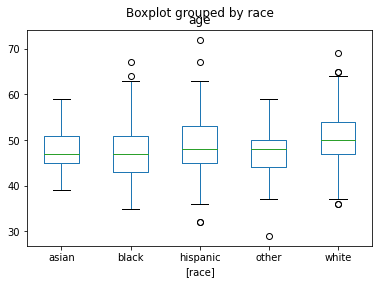

In [17]:
# Generate a boxplot to see the data distribution by race

voter_frame_d.boxplot(by='race', grid=False)

Again, visually it's not very clear if there is any difference in the average age between the different races. In this dataset we can see more outliers (present on black, hispanic, other and white races) compared to the first one.

### Models

#### First dataset

In [18]:
# Perform the ANOVA (http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16_23.html)
stats.f_oneway(asian_s, black_s, hispanic_s, other_s, white_s)

F_onewayResult(statistic=1.7744689357329695, pvalue=0.13173183201930463)

The ANOVA for the first dataset shows that the null hypothesis is not rejected for a chosen alpha of 0.05, indicating that there is not a strong evidence that the average age between races differs.

#### Second dataset

In [19]:
# Perform the ANOVA (http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16_23.html)
stats.f_oneway(asian_d, black_d, hispanic_d, other_d, white_d)

F_onewayResult(statistic=10.164699828386366, pvalue=4.5613242113994585e-08)

For the second dataset, the ANOVA presented a significant p-value, smaller than a chosen alpha of 0.05. The null hypothesis is then rejected.

The code below performs a pairwise t-test between all combinations of two races. Since there are ten possible combinations, ten tests are performed. The results suggest that the average age of white voters is different from all the other groups with the p-values reported being less than 0.05. In this case, it might be worth to consider the Bonferroni correction since there are multiple tests (m=10) being performed. For this situation in particular, we would be comparing each p-value with an alpha value of 0.05/10 = 0.005.

In [20]:
# Get all race pairs (http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16_23.html)
race_pairs = []

for race1 in range(4):
    for race2  in range(race1+1,5):
        race_pairs.append((races[race1], races[race2]))

# Conduct t-test on each pair
for race1, race2 in race_pairs: 
    print(race1, race2)
    print(stats.ttest_ind(voter_age_d[groups_d[race1]], 
                          voter_age_d[groups_d[race2]])) 

asian black
Ttest_indResult(statistic=0.838644690974798, pvalue=0.4027281369339345)
asian hispanic
Ttest_indResult(statistic=-0.42594691924932293, pvalue=0.6704669004240726)
asian other
Ttest_indResult(statistic=0.9795284739636, pvalue=0.3298877500095151)
asian white
Ttest_indResult(statistic=-2.318108811252288, pvalue=0.020804701566400217)
black hispanic
Ttest_indResult(statistic=-1.9527839210712925, pvalue=0.05156197171952594)
black other
Ttest_indResult(statistic=0.28025754367057176, pvalue=0.7795770111117659)
black white
Ttest_indResult(statistic=-5.379303881281835, pvalue=1.039421216662395e-07)
hispanic other
Ttest_indResult(statistic=1.5853626170340225, pvalue=0.11396630528484335)
hispanic white
Ttest_indResult(statistic=-3.5160312714115376, pvalue=0.0004641298649066684)
other white
Ttest_indResult(statistic=-3.763809322077872, pvalue=0.00018490576317593065)


#### Tukey's test for the second dataset
Since the ANOVA results for the second dataset showed that we should reject the null hypothesis, a Tukey's test, to identify which groups are different from each other, should be performed.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


group1,group2,meandiff,p-adj,lower,upper,reject
asian,black,-0.8032,0.9,-3.4423,1.836,False
asian,hispanic,0.4143,0.9,-2.1011,2.9297,False
asian,other,-1.0645,0.8852,-4.2391,2.11,False
asian,white,1.9547,0.175,-0.4575,4.3668,False
black,hispanic,1.2175,0.2318,-0.386,2.821,False
black,other,-0.2614,0.9,-2.7757,2.253,False
black,white,2.7579,0.001,1.3217,4.194,True
hispanic,other,-1.4789,0.4391,-3.863,0.9053,False
hispanic,white,1.5404,0.004,0.3468,2.734,True
other,white,3.0192,0.0028,0.7443,5.2941,True


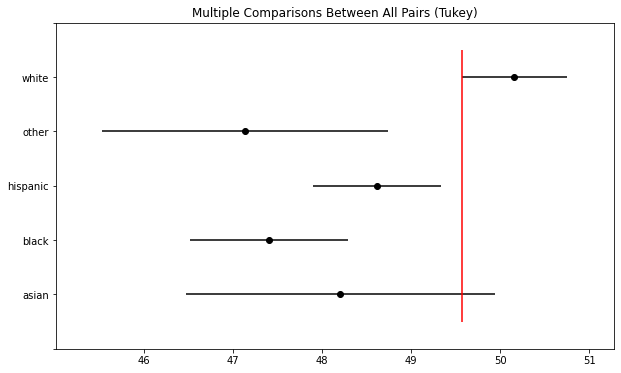

In [21]:
# Tukey's test (http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16_23.html)

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=voter_age_d,     # Data
                          groups=voter_race_d,   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary() 

From the results of the Tukey's test we can observe that the null hypothesis, where the average age between two groups are not different, should be rejected when using the white race as one group and black, hispanic or other as the other group. The null hypothesis is not rejected when comparing the white race group with the asian group.

### Conclusions
For this assignment we can conclude that the ANOVA test allows us to test if a numeric variable varies with respect to the different levels of a categorical variable. The Bonferroni correction can be used to compensante for an increase in rare occurancies when performing multiple tests but it should be noted that it might also hide potentially significant results, indicating they are no significant when comparing to a lower value of alpha. In case of rejection of the null hypothesis reported by the ANOVA test, a Tukey's test can be used to find out which groups differ from each other.

The ANOVA test can be used in python using the [scipy.stats package](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html#scipy.stats.f_oneway)
<br>
The Tukey's test can be used in python using [statsmodels.stats.multicomp](https://www.statsmodels.org/stable/generated/statsmodels.sandbox.stats.multicomp.MultiComparison.html)

### References
1. http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16_23.html
2. https://statisticsbyjim.com/anova/f-tests-anova/
3. https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide.php
4. https://en.wikipedia.org/wiki/Bonferroni_correction
5. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
6. https://docs.scipy.org/doc/scipy/reference/stats.html
7. https://www.statsmodels.org/stable/generated/statsmodels.sandbox.stats.multicomp.MultiComparison.html